# Bernese parsers

Examples are shown how to use some of following Midgard Bernese parsers:

| Parser name        | Description                        |
| :------------------| :--------------------------------- |
| bernese_clu        | Bernese cluster file |
| bernese_compar_out | Bernese coordinate comparison file | 
| bernese_crd        | Bernese station coordinate file |
| bernese_prc        | Bernese protocol file |
| bernese_slr_plt    | Bernese SLR plot file |
| bernese_sta        | Bernese station information file |
| bernese_trp        | Bernese troposphere solution file |

## Use of bernese_crd parser

An example is shown, how to use the **bernese_crd** parser:

In [1]:
# Import parsers package
from midgard import parsers

# Import unit package for unit conversion
from midgard.math.unit import Unit

# Read file by generating an instance of a Parser class
p = parsers.parse_file(parser_name="bernese_crd", file_path="../../tests/parsers/example_files/bernese_crd")

# Generate dataset based on read file data
dset = p.as_dataset()

**dset** is a Midgard dataset with following data fields, which represents a column in the dataset:

|  Field                   | Type           | Description                                                      |
| :----------------------- | :------------- | :--------------------------------------------------------------- |
| domes                    | numpy.ndarray  | Domes number                                                     |
| flag                     | numpy.ndarray  | Station flag (see section 24.7.1 of Bernese GNSS software        |
|                          |                | version 5.2, November 2015)                                      |
| station                  | numpy.ndarray  | Station name                                                     |
| site_pos                 | PositionTable  | Station coordinates given as PositionTable object                |


In [2]:
# Show dataset fields
dset.fields

['domes', 'flag', 'site_pos', 'station']

The **site_pos** dataset field includes the station coordinates read from the Bernese CRD file. The **site_pos** field is an **Position** object with methods for conversion from geocentric coordinates (X, Y, Z) to geodetic coordinates (latitude, longitude, height) given in **radian** (see **position.ipynb** Jupyter notebook for more information).

In [3]:
for sta, lat, lon, height in zip(dset.station, dset.site_pos.llh.lat, dset.site_pos.llh.lon, dset.site_pos.llh.height):
    print(f"{sta.upper()}  LAT {lat*Unit.rad2deg:.4f} deg, LON {lon*Unit.rad2deg:.4f} deg, HEIGHT {lon*Unit.rad2deg:.4f} m")

0ABI  LAT 68.3543 deg, LON 18.8164 deg, HEIGHT 18.8164 m
AASC  LAT 59.6603 deg, LON 10.7817 deg, HEIGHT 10.7817 m
ADAC  LAT 70.4104 deg, LON 26.6954 deg, HEIGHT 26.6954 m


In the following it is shown how to plot the station coordinates with **matplotlib** and **cartopy**:

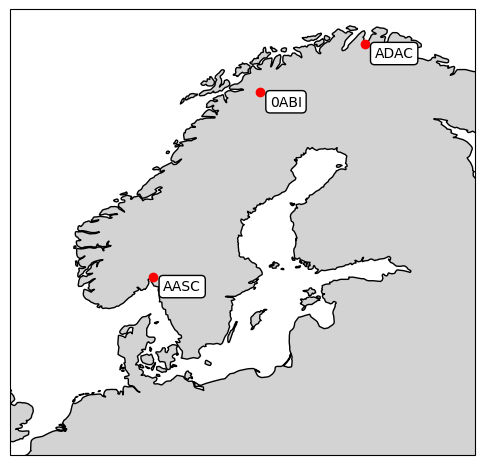

In [5]:
# Import plotting modules
# NOTE: THE CARTOPY MODULES ARE NOT PART OF MIDGARD INSTALLATION. THEY
#       HAVE TO BE INSTALLED.
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

# Initialize figure object
fig = plt.figure(figsize=(6, 6))

# Define projection
projection = ccrs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([0, 35, 50, 71], crs=ccrs.Geodetic())

# Define mapping dataset
dataset = cfeature.NaturalEarthFeature(
    category="physical",  # Category of dataset: <cultural|physical|raster>
    name="land",  # Name of dataset: <coastline, land, ocean, ...>
    scale="50m",  # Scale: <10m|50m|110m>
    facecolor="lightgray",
)

# Add features
ax.add_feature(dataset)
ax.coastlines(resolution="50m", color="black")

# Use the cartopy interface to create a matplotlib transform object for the Geodetic
# coordinate system. We will use this along with matplotlib's offset_copy function 
# to define a coordinate system which translates the text by 15 pixels to the right 
# and 10 pixels downwards.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units="dots", x=+10, y=-10)

# Plot station location
for sta  in dset.unique("station"):
    idx = dset.filter(station=sta)
    
    # Add station markers
    ax.plot(
        dset.site_pos.llh.lon[idx] * Unit.rad2deg,
        dset.site_pos.llh.lat[idx] * Unit.rad2deg,
        marker="o",
        color="red",
        transform=ccrs.Geodetic(),
    )
    
    # Add station text
    ax.text(
        dset.site_pos.llh.lon[idx] * Unit.rad2deg,
        dset.site_pos.llh.lat[idx] * Unit.rad2deg,
        f"{sta.upper()}",
        verticalalignment="center",
        horizontalalignment="left",
        transform=text_transform,
        bbox=dict(facecolor="white", alpha=1, boxstyle="round"),
    )

## Use of bernese_prc parser

An example is shown, how to use the **bernese_prc** parser:


In [7]:
# Import parsers package
from midgard import parsers

# Import unit package for unit conversion
from midgard.math.unit import Unit

# Read file by generating an instance of a Parser class
p = parsers.parse_file(parser_name="bernese_prc", file_path="../../tests/parsers/example_files/bernese_prc")

# Generate dataset based on read file data
dset = p.as_dataset()

**dset** is a Midgard dataset with following data fields, which represents a column in the dataset:

|  Field                  | Type          | Description                                                       |
| :---------------------- | :------------ | :---------------------------------------------------------------- |
| coord_comp_east_day<x>  | numpy.ndarray | Station coordinate comparison results for East component in [m]   |
|                         |               | for day X (X=[1,2,...,7])                                         |
| coord_comp_north_day<x> | numpy.ndarray | Station coordinate comparison results for North component in [m]  |
|                         |               | for day X (X=[1,2,...,7])                                         |
| coord_comp_up_day<x>    | numpy.ndarray | Station coordinate comparison results for Up component in [m]     |
|                         |               | for day X (X=[1,2,...,7])                                         |
| coord_comp_rms_east     | numpy.ndarray | List with daily station coordinate comparison results for East    |
|                         |               | component in [m]                                                  |
| coord_comp_rms_north    | numpy.ndarray | List with daily station coordinate comparison results for North   |
|                         |               | component in [m]                                                  |
| coord_comp_rms_up       | numpy.ndarray | List with daily station coordinate comparison results for Up      |
|                         |               | component in [m]                                                  |
| num_of_days             | numpy.ndarray | Number of days used for analysis                                  |
| pos_mean_x              | numpy.ndarray | X-coordinate of mean station coordinate position in [m]           |
| pos_mean_x_rms1         | numpy.ndarray | RMS1 of X-coordinate of mean station coordinate position in [m]   |
| pos_mean_x_rms2         | numpy.ndarray | RMS2 of X-coordinate of mean station coordinate position in [m]   |
| pos_mean_y              | numpy.ndarray | Y-coordinate of mean station coordinate position in [m]           |
| pos_mean_y_rms1         | numpy.ndarray | RMS1 of Y-coordinate of mean station coordinate position in [m]   |
| pos_mean_y_rms2         | numpy.ndarray | RMS2 of Y-coordinate of mean station coordinate position in [m]   |
| pos_mean_z              | numpy.ndarray | Z-coordinate of mean station coordinate position in [m]           |
| pos_mean_z_rms1         | numpy.ndarray | RMS1 of Z-coordinate of mean station coordinate position in [m]   |
| pos_mean_z_rms2         | numpy.ndarray | RMS2 of Z-coordinate of mean station coordinate position in [m]   |
| repeatability_east      | numpy.ndarray | Station coordinate repeatability for East component in [m]        |
| repeatability_north     | numpy.ndarray | Station coordinate repeatability for North component in [m]       |
| repeatability_up        | numpy.ndarray | Station coordinate repeatability for Up component in [m]          |
| residual_east           | numpy.ndarray | Station residuals for East component in [m]                       |
| residual_north          | numpy.ndarray | Station residuals for North component in [m]                      |
| residual_up             | numpy.ndarray | Station residuals for Up component in [m]                         |
| station                 | numpy.ndarray | Station names                                                     |
| time                    | TimeTable     | Date of analysis session                                          |

In the following it is shown how to plot the RMS of comparison of coordinates station coordinates with **matplotlib**:

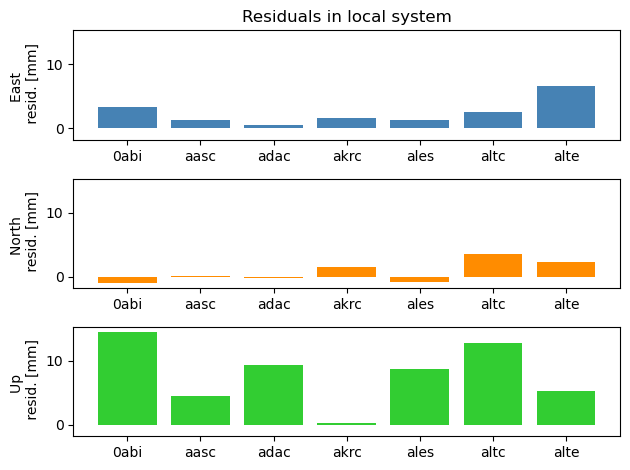

In [8]:
# Import plotting module
import matplotlib.pyplot as plt

# Plot bar figure
fig, axs = plt.subplots(3,1, sharey=True)
axs[0].bar(dset.station, dset.residual_east * Unit.m2mm, color="steelblue") 
axs[1].bar(dset.station, dset.residual_north * Unit.m2mm, color="darkorange") 
axs[2].bar(dset.station, dset.residual_up * Unit.m2mm, color="limegreen") 
axs[0].set_ylabel('East \n resid. [mm]')
axs[1].set_ylabel('North \n resid. [mm]')
axs[2].set_ylabel('Up \n resid. [mm]')
axs[0].set_title('Residuals in local system')
fig.tight_layout()

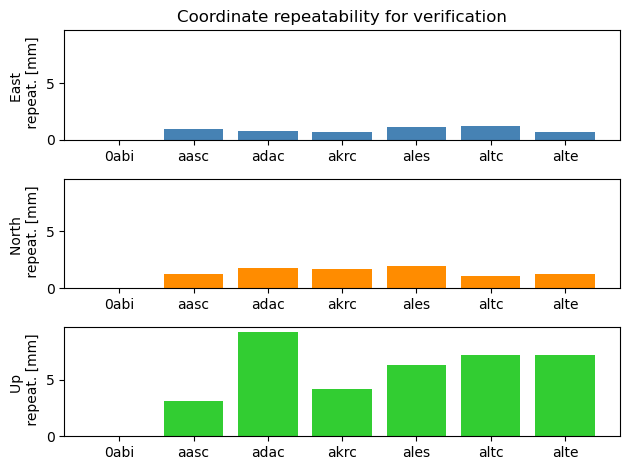

In [9]:
# Plot bar figure
fig, axs = plt.subplots(3,1, sharey=True)
axs[0].bar(dset.station, dset.repeatability_east * Unit.m2mm, color="steelblue") 
axs[1].bar(dset.station, dset.repeatability_north * Unit.m2mm, color="darkorange") 
axs[2].bar(dset.station, dset.repeatability_up * Unit.m2mm, color="limegreen") 
axs[0].set_ylabel('East \n repeat. [mm]')
axs[1].set_ylabel('North \n repeat. [mm]')
axs[2].set_ylabel('Up \n repeat. [mm]')
axs[0].set_title('Coordinate repeatability for verification')
fig.tight_layout()

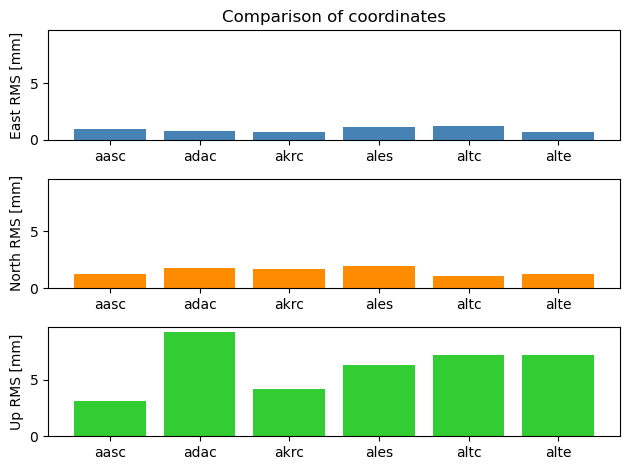

In [10]:
# Plot bar figure
fig, axs = plt.subplots(3,1, sharey=True)
axs[0].bar(dset.station, dset.coord_comp_rms_east * Unit.m2mm, color="steelblue") 
axs[1].bar(dset.station, dset.coord_comp_rms_north * Unit.m2mm, color="darkorange") 
axs[2].bar(dset.station, dset.coord_comp_rms_up * Unit.m2mm, color="limegreen") 
axs[0].set_ylabel('East RMS [mm]')
axs[1].set_ylabel('North RMS [mm]')
axs[2].set_ylabel('Up RMS [mm]')
axs[0].set_title('Comparison of coordinates')
fig.tight_layout()

## Use of bernese_trp parser

An example is shown, how to use the **bernese_trp** parser:

In [11]:
# Import parsers package
from midgard import parsers

# Read file by generating an instance of a Parser class
p = parsers.parse_file(parser_name="bernese_trp", file_path="../../tests/parsers/example_files/bernese_trp")

# Generate dataset based on read file data
dset = p.as_dataset()

**dset** is a Midgard dataset with following data fields, which represents a column in the dataset:

|  Field                    | Type           | Description                                                     |
| :------------------------ | :------------- | :-------------------------------------------------------------- |
| flag                      | numpy.ndarray  | Station flag (see section 24.7.1 of Bernese GNSS software       |
|                           |                | version 5.2, November 2015)                                     |
| station                   | numpy.ndarray  | Station name                                                    |
| time                      | TimeTable      | Observation time given as TimeTable object                      |
| trop_gradient_east        | numpy.ndarray  | Troposphere horizontal gradients in East/West direction in [m]  |
| trop_gradient_east_sigma  | numpy.ndarray  | Standard deviation of troposphere horizontal gradients in       |
|                           |                | East/West direction in [m]                                      |
| trop_gradient_north       | numpy.ndarray  | Troposphere horizonatl gradients in North/South direction in [m]|
| trop_gradient_north_sigma | numpy.ndarray  | Standard deviation of troposphere horizontal gradients in       |
|                           |                | North/South direction in [m]                                    |
| trop_zenith_dry           | numpy.ndarray  | Zenith hydrostatic/dry troposphere delay from a-priori model in |
|                           |                | [m]                                                             |
| trop_zenith_total         | numpy.ndarray  | Zenith total troposphere delay in [m]                           |
| trop_zenith_wet           | numpy.ndarray  | Zenith wet troposphere delay (estimated part) in [m]            |
| trop_zenith_wet_sigma     | numpy.ndarray  | Standard devivation of zenith wet troposphere delay in [m]      |

In [ ]:
# Show dataset fields
dset.fields

In [12]:
# Get data for a specific station by filtering dataset
idx = dset.filter(station="adac")

print("STA  YYYY-MM-DD HH:MM:DD  ZWD     SIG_ZWD")
for sta, time, zwd, sig_zwd in zip(
                    dset.station[idx], 
                    dset.time.datetime[idx], 
                    dset.trop_zenith_wet[idx],
                    dset.trop_zenith_wet_sigma[idx],
):
    print(f"{sta} {time.strftime('%Y-%m-%d %H:%M:%S')} {zwd:7.4f} {sig_zwd:7.4f}")

STA  YYYY-MM-DD HH:MM:DD  ZWD     SIG_ZWD
adac 2021-01-30 00:00:00  0.0480  0.0010
adac 2021-01-30 02:00:00  0.0466  0.0007
adac 2021-01-30 04:00:00  0.0454  0.0007
adac 2021-01-30 06:00:00  0.0449  0.0008
adac 2021-01-30 08:00:00  0.0445  0.0007
adac 2021-01-30 10:00:00  0.0447  0.0007
adac 2021-01-30 12:00:00  0.0465  0.0008
adac 2021-01-30 14:00:00  0.0492  0.0007
adac 2021-01-30 16:00:00  0.0509  0.0007
adac 2021-01-30 18:00:00  0.0501  0.0009
adac 2021-01-30 20:00:00  0.0462  0.0009
adac 2021-01-30 22:00:00  0.0509  0.0008
adac 2021-01-31 00:00:00  0.0490  0.0013


In the following it is shown how to plot the tropospheric solution parameters with **matplotlib**:

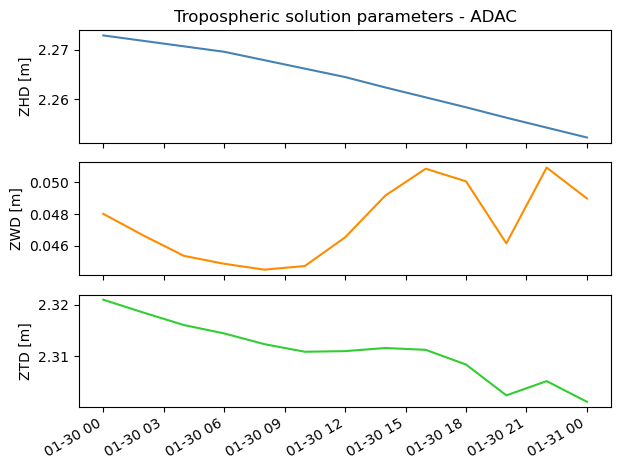

In [13]:
# Import plotting module
import matplotlib.pyplot as plt

# Choose station to plot
station = "adac"

# Generate index for given station, which is used to filter only data related to given station
idx = dset.filter(station=station)

# Plot scatter subplots figure
fig, axs = plt.subplots(3,1, sharex=True)
axs[0].plot(dset.time.datetime[idx], dset.trop_zenith_dry[idx], color="steelblue") 
axs[1].plot(dset.time.datetime[idx], dset.trop_zenith_wet[idx], color="darkorange") 
axs[2].plot(dset.time.datetime[idx], dset.trop_zenith_total[idx], color="limegreen") 
axs[0].set_ylabel('ZHD [m]')
axs[1].set_ylabel('ZWD [m]')
axs[2].set_ylabel('ZTD [m]')
axs[0].set_title(f"Tropospheric solution parameters - {station.upper()}")
fig.autofmt_xdate()
fig.tight_layout()